# Example python code for plotting data from Wilber3 seismic event archive


### Note: File has c. 9000 events, drawing may take awhile (30-40 seconds), so be patient if nothig appears to be happening at first!

This code has been adapted to plot data that crosses the international date line, e.g. data from the Kermadec Trench north of New Zealand (westerly dipping subduction).

The code below will read in a text file, as downloaded from the Wilber3 archive at IRIS, and plots a map of the events and a graph of depth versus longitude. The file andes_quakes.txt must be in the same directory as this notebook.

The data file that is pointed to is a selection of events from the central Andes (kermadec_quakes.txt). You can change this of course, just edit the file name variable to point to the file you want to plot data from.

[[ -21.1536 -178.5635  551.41      4.5   ]
 [ -17.7822 -174.5981   96.54      4.9   ]
 [ -22.531  -179.1205  545.09      4.6   ]
 ...
 [ -16.8044 -174.5933  250.        3.8   ]
 [ -18.0569 -179.4917  622.        4.    ]
 [ -23.7474  179.973   528.        4.5   ]]
[[ -14.     -171.59     23.        1.4   ]
 [ -14.03   -171.64     17.        1.5   ]
 [ -14.01   -171.65     17.        1.6   ]
 ...
 [ -19.3542  176.058    12.        6.9   ]
 [ -18.4952  179.3555  617.87      7.9   ]
 [ -18.1125 -178.1536  600.        8.2   ]]
[-171.59   -171.64   -171.65   ...  176.058   179.3555 -178.1536]


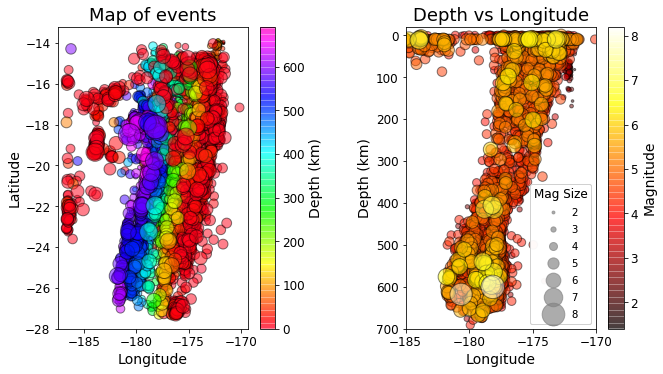

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# setup default font sizes for plot elements
TINY_SIZE = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=TINY_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
 
# read data file Wilber3 IRIS text format
filename = "kermadec_quakes.txt"
# read latitude, longitude, depth and magnitude columns into single array object called data
data_in = np.genfromtxt(filename, comments ="#", delimiter="|", usecols=(2,3,4,10))
print (data_in) # write data to screen to check 

# sort the data array on magnitude, so that large magnitudes are plotted last 
data = data_in[data_in[:,3].argsort()]
print(data) # write out sorted array to screen to check things worked out

# extract columns into single 1D arrays to make plotting easier
latitude =  data[:,0]	#[:,0] means "read all lines from first column, ie index 0
longitude = data[:,1]	#[:,1] means "read all lines from second column, ie index 1
depth =     data[:,2]	#[:,2] means "read all lines from third column, ie index 2
magnitude = data[:,3]	#[:,3] means "read all lines from fourth column, ie index 3
print (longitude)

# adjust positive longitudes so that they plot properly across the dateline , i.e. -180 west 
for n in range(0,len(longitude)):
    if longitude[n] > 0.0:
       longitude[n]=longitude[n]-360.

# plot map of epicentres and a plot of depth versus longitude, i.e. a west-east section
# start by setting overall figure size, width, height (in inches)
fig = plt.figure(figsize=(10, 6))

# setup two subplots in figure, i.e. two xy plots side by side on page
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# draw map 1
map1 = ax1.scatter(longitude, latitude, s=(magnitude**3), c=depth, cmap="gist_rainbow", alpha=0.5, edgecolors="black", linewidth=1)

#write axes labels and plot title for map1
ax1.set_ylabel('Latitude')
ax1.set_xlabel('Longitude')
ax1.set_title('Map of events')

# draw map 2, depth versus longitude
map2 = ax2.scatter(longitude, depth, s=(magnitude**3), c=magnitude, cmap="hot", alpha=0.5, edgecolors="black", linewidth=1)

# setup marker size legend for magnitudes
legend_mag_sizes = ax2.legend(*map2.legend_elements(prop="sizes",func=lambda x:np.cbrt(x),color="gray", num=6, alpha=0.6),\
                         loc="lower right", title="Mag Size")

# write axes labels and plot title for map2
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Depth (km)')
ax2.set_title('Depth vs Longitude')
ax2.set_ylim(700,-20) #reverse y axis so depths plot increasing downwards
ax2.set_xlim(-185,-170)

#setup a legend with the unique colors from the depths
#legend_depth_color = ax1.legend(*map1.legend_elements(prop="colors", alpha=0.6), loc="lower left", title="Depth (km)")

#draw the legend for map1
#ax1.add_artist(legend_depth_color)
fig.colorbar(map1, ax=ax1, label="Depth (km)") # plot the color bar along side the map

# setup a legend with the unique colors from the magnitudes
#legend_mag_color = ax2.legend(*map2.legend_elements(), loc="lower left",title="Magnitude")

# draw the legends for map2
#ax2.add_artist(legend_mag_color)
ax2.add_artist(legend_mag_sizes)
fig.colorbar(map2, ax=ax2, label="Magnitude") # plot color bar along side map2

# Set padding between plots so axes labels don't overlap
fig.tight_layout(pad=3.0)

# output figure to pdf file for printing etc
# file is written to the same directory your data file is in
#plt.savefig('Kermadec_quakes_plot.pdf')

plt.show()